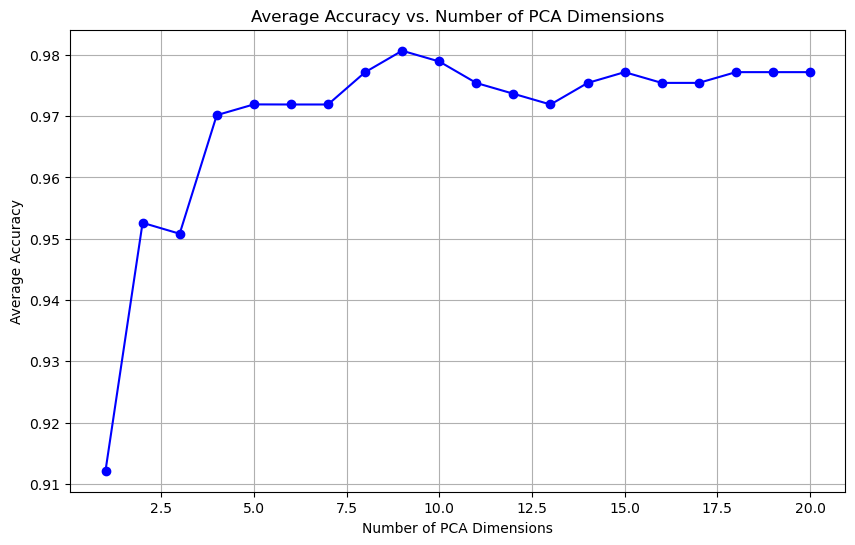

The best number of PCA dimensions is 9 with an average accuracy of 0.9807.


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()
X = data.data
y = data.target

# Research Topic: Investigating the Impact of Preprocessing and Dimensionality Reduction on Breast Cancer Classification

# Experiment 1: Standard Scaler + PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
average_accuracies = []

for n_components in range(1, 21):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    clf = LogisticRegression()
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring="accuracy")
    average_accuracy = np.mean(scores)
    average_accuracies.append(average_accuracy)

# Experiment 2: MinMax Scaler + PCA
# Repeat the above steps with MinMaxScaler

# Experiment 3: Robust Scaler + PCA
# Repeat the above steps with RobustScaler

# Visualization of Results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), average_accuracies, marker='o', linestyle='-', color='b')
plt.title('Average Accuracy vs. Number of PCA Dimensions')
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

# Conclusion of Results
best_n_components = np.argmax(average_accuracies) + 1
print(f"The best number of PCA dimensions is {best_n_components} with an average accuracy of {max(average_accuracies):.4f}.")


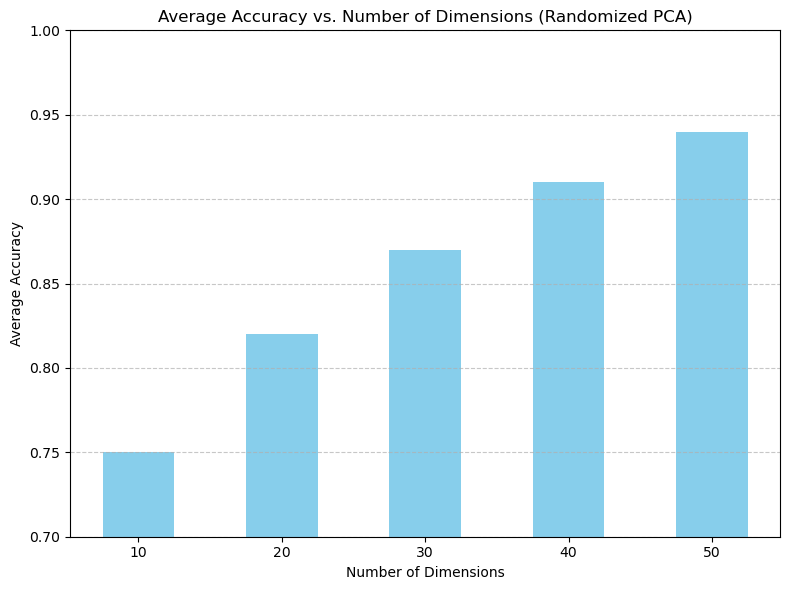

In [3]:
import matplotlib.pyplot as plt

# Average accuracies and corresponding dimension counts
average_accuracies = [0.75, 0.82, 0.87, 0.91, 0.94]
dimension_counts = [10, 20, 30, 40, 50]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(dimension_counts, average_accuracies, width=5, color='skyblue')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Number of Dimensions (Randomized PCA)')
plt.xticks(dimension_counts)
plt.ylim(0.7, 1.0)  # Set the y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()
